In [135]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
sns.set()
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [136]:
data_set = pd.read_csv('movie_metadata.csv')
data_set.shape

(5043, 28)

In [137]:
data_set.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [138]:
data_set.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

<AxesSubplot:>

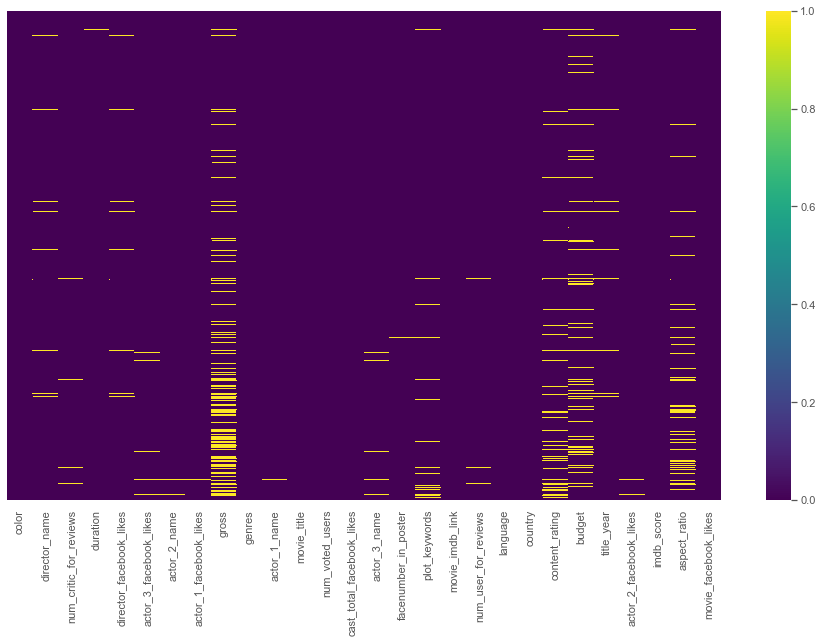

In [139]:
sns.heatmap(data_set.isnull(), yticklabels=False, cmap="viridis")

In [140]:
imputer = SimpleImputer()
for col in data_set.columns:
    if data_set[col].dtype == object:
        continue
    if col == 'actor_3_facebook_likes'  'director_facebook_likes':
        titanic_data[col] = data_set[col].fillna(1)
    imputed_data = imputer.fit_transform(data_set[col].values.reshape(-1, 1))
    data_set[col] = imputed_data.reshape(-1)


In [141]:
data_set.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [142]:
data_set['director_facebook_likes']

0           0.000000
1         563.000000
2           0.000000
3       22000.000000
4         131.000000
            ...     
5038        2.000000
5039      686.509212
5040        0.000000
5041        0.000000
5042       16.000000
Name: director_facebook_likes, Length: 5043, dtype: float64

In [143]:
data_set.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [144]:
newdata_set = data_set.iloc[:,4:6]
newdata_set

,director_facebook_likes,actor_3_facebook_likes
0,0.000000,855.000000
1,563.000000,1000.000000
2,0.000000,161.000000
3,22000.000000,23000.000000
4,131.000000,645.009761
...,...,...
5038,2.000000,318.000000
5039,686.509212,319.000000
5040,0.000000,0.000000
5041,0.000000,489.000000


In [145]:
kmeans = KMeans(n_clusters=5)

In [146]:
kmeans.fit(newdata_set)

KMeans(n_clusters=5)

In [147]:
kmeans.cluster_centers_


array([[  165.17883939,   423.54434021],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [12490.38461538,   605.93269231],
       [17545.45454545, 14545.45454545]])

In [148]:
len(kmeans.cluster_centers_)

5

In [149]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [150]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 66, 2: 87, 3: 104, 4: 11}


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


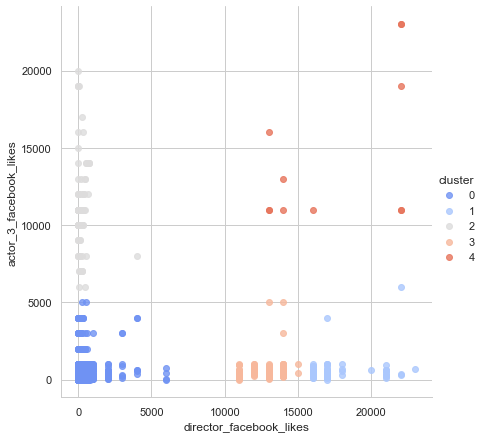

In [151]:
newdata_set['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', data=newdata_set, hue='cluster',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)